## Introduction- Prosper Loan Data

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others (as per the website).

The primary objective of this project is to analyse the different variables that can impact the loan status. Also, to get some quantifiable insights by performing univariate, bivariate and multivariate analysis that could describe relationships among multiple variables using statistics and data visualizations.


In [76]:
# import all packages and set plots to be embedded inline
# import useful libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [77]:
# load in the dataset into a pandas dataframe, print statistics
loan_data = pd.read_csv('prosperLoanData.csv')

In [78]:
# high-level overview of data shape and composition
print(loan_data.shape)
print(loan_data.dtypes)
print(loan_data.head(5))

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [2]:
#loan_data.describe()

In [79]:
# taking relevant columns for this analysis
loan_data=loan_data[['ListingNumber', 'ListingCreationDate', 'IsBorrowerHomeowner','Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
           'ProsperRating (Alpha)','BorrowerState','Occupation','DebtToIncomeRatio', 'IncomeRange','LoanOriginalAmount',
       'LoanOriginationDate', 'LoanOriginationQuarter','Investors']]
print(loan_data.head(2))
print(loan_data.info())

   ListingNumber            ListingCreationDate  IsBorrowerHomeowner  Term  \
0         193129  2007-08-26 19:09:29.263000000                 True    36   
1        1209647  2014-02-27 08:28:07.900000000                False    36   

  LoanStatus           ClosedDate  BorrowerAPR  BorrowerRate  \
0  Completed  2009-08-14 00:00:00      0.16516         0.158   
1    Current                  NaN      0.12016         0.092   

  ProsperRating (Alpha) BorrowerState    Occupation  DebtToIncomeRatio  \
0                   NaN            CO         Other               0.17   
1                     A            CO  Professional               0.18   

      IncomeRange  LoanOriginalAmount  LoanOriginationDate  \
0  $25,000-49,999                9425  2007-09-12 00:00:00   
1  $50,000-74,999               10000  2014-03-03 00:00:00   

  LoanOriginationQuarter  Investors  
0                Q3 2007        258  
1                Q1 2014          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex

In [80]:
# renamimg Prosper rating column
loan_data.rename(columns={'ProsperRating (Alpha)': 'Prosper_Ratings'}, inplace=True)
loan_data.columns

Index(['ListingNumber', 'ListingCreationDate', 'IsBorrowerHomeowner', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'Prosper_Ratings', 'BorrowerState', 'Occupation', 'DebtToIncomeRatio',
       'IncomeRange', 'LoanOriginalAmount', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'Investors'],
      dtype='object')

## Univariate Analysis
### 1. Which are the major income buckets of our existing customers?

In [1]:
#### creating a function to plot bar graphs for univariate

def grph_plt(df, color_no, fig_size_x, fig_size_y, title, label_x, label_y):
"""
Description: This function can be used to create bar graphs for univariate analysis.
Arguments:
    df: data to be used for plotting
    color_no: a color number that could be passed to sns plots
    fig_size_x and fig_size_y: plot size
    title: plot title
    label_x: label for x axis
    label_y: label for y axis
Returns:
    bar plot 
"""
    plt.figure(figsize=(fig_size_x, fig_size_y))
    color = sns.color_palette()[color_no]
    df.plot(kind='bar', color=color)
    
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    
    return plt
    

In [81]:
# count in each income range
incm_range_cnt = loan_data.IncomeRange.value_counts()
incm_range_cnt

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

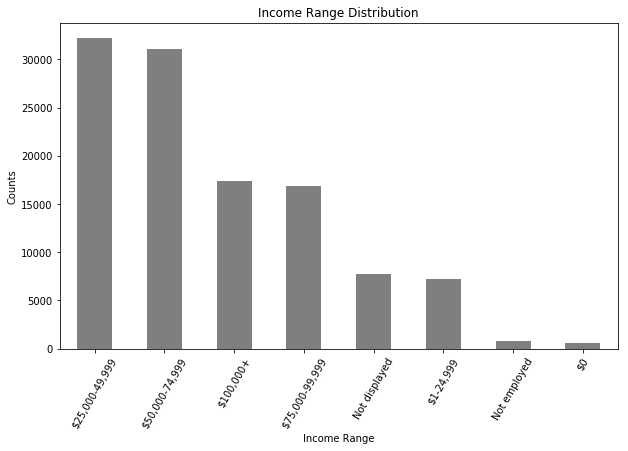

In [82]:
# Visualising through the bar graph to understand the distribution

grph_plt(incm_range_cnt, 7, 10, 6, 'Income Range Distribution', 'Income Range', 'Counts')

#plt.figure(figsize=(10, 6))
#color = sns.color_palette()[7]
#incm_range_cnt.plot(kind='bar', color=color);

#plt.title('Income Range Distribution');
#plt.xlabel('Income Range');
#plt.ylabel('Counts');

#plt.xticks(rotation=60);

### Conclusion

Above univariate analysis with respect to income range is performed to understand the distribution of overall income of data. As per the plot, maximum population(around 35000)falls below 50000 dollars followed by 50000-74999 dollars. 

Moreover, it can be observed that higher income ranges has lower counts.


### 2. How are ratings distributed across the population and does it affect the loan to be given?

In [83]:
# total count for each rating 
rating_count = loan_data.Prosper_Ratings.value_counts()
rating_count

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: Prosper_Ratings, dtype: int64

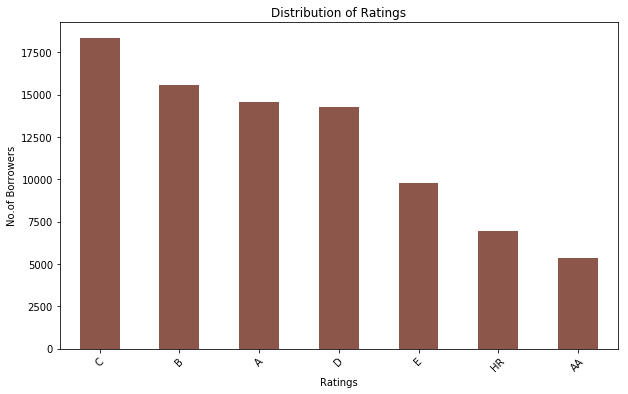

In [84]:
# visualising the rating counts through bar graph

grph_plt(rating_count, 5, 10, 6, 'Distribution of Ratings', 'Ratings', 'No.of Borrowers')

#plt.figure(figsize=(10, 6))
#color = sns.color_palette()[5]


#rating_count.plot(kind='bar', color=color);

#plt.title('Distribution of Ratings');
#plt.xlabel('Ratings');
#plt.ylabel('No.of Borrowers');

#plt.xticks(rotation=45);

### Conclusion

Prosper loans are assigned a rating from AA (lower risk, lower return) to HR(higher risk, higher return). As per the above plot, it can be seen that lower risk has the least population whereas rating "C". This shows that if it can be arranged in the ordered ratings it would be a bell curve distribution. Thus, this analysis does not provide much informstion on loan risk.


### 3. How the amount is distributed under Loan Status?

In [85]:
# count of Loan status types 

loan_status_cnt = loan_data.LoanStatus.value_counts()
loan_status_cnt

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

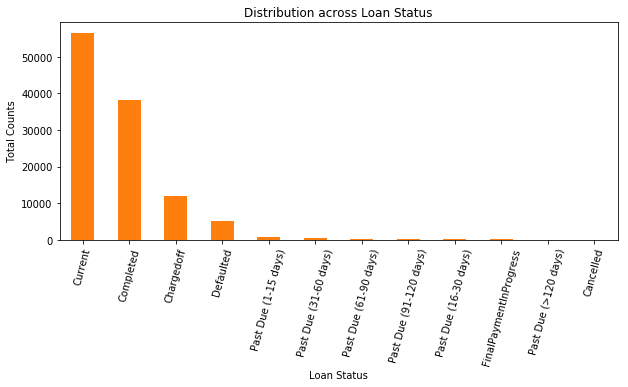

In [86]:
# visualising above numbers

grph_plt(loan_status_cnt, 1, 10, 4, 'Distribution across Loan Status', 'Loan Status', 'Total Counts')

#plt.figure(figsize=(10, 4))
#color = sns.color_palette()[1]
#loan_status_cnt.plot(kind='bar', color=color);

#plt.title('Distribution across Loan Status');
#plt.xlabel('Loan Status');
#plt.ylabel('Total Counts');

#plt.xticks(rotation=75);

### Conclusion

The above plot shows that Current status has got the highest number of counts followed by Completed and Chargedoff. Other are the dues for different time spans, however, the frequency under due category is very less.


In [87]:
loan_data.Occupation.value_counts()

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

## Bivariate Analysis

### 1. How is loan amount distributed across Occupation?

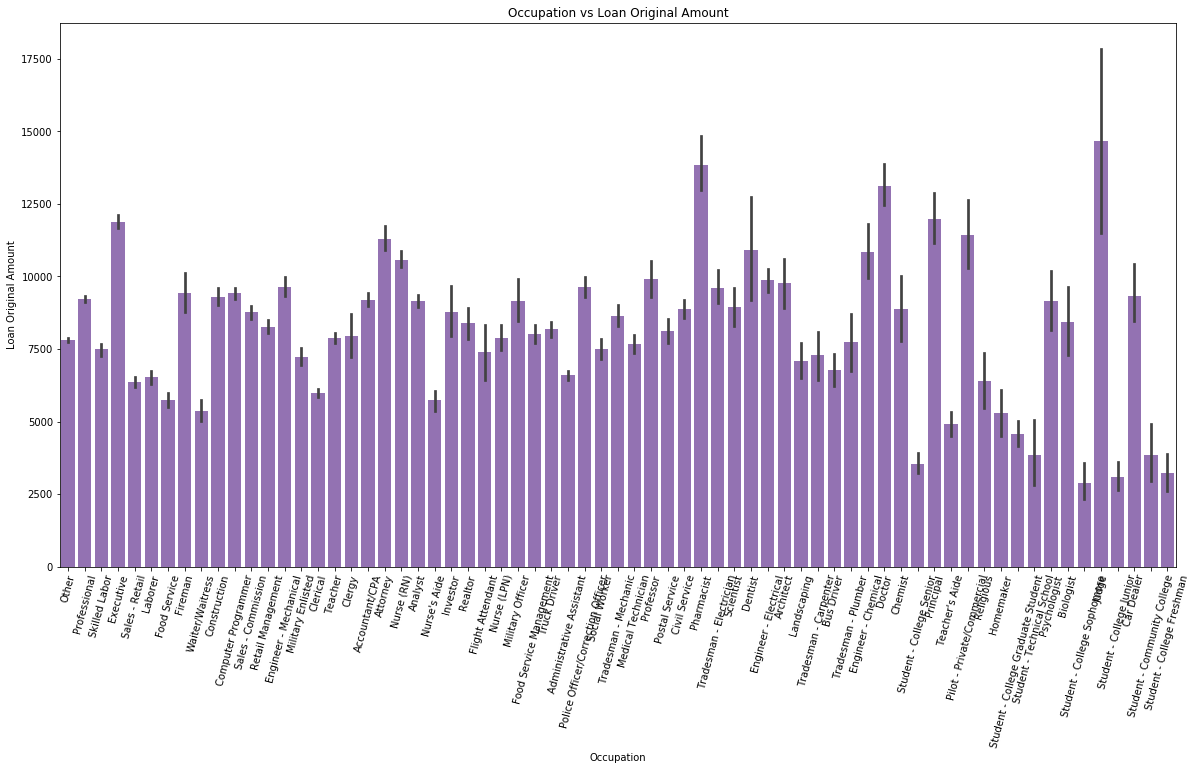

In [88]:
# plotting the boxplot
color = sns.color_palette()[4]
box = sns.barplot(data=loan_data, x='Occupation', y='LoanOriginalAmount', color=color);

plt.xticks(rotation=75);
plt.xlabel('Occupation')
plt.ylabel('Loan Original Amount')
plt.title('Occupation vs Loan Original Amount')

box.figure.set_figwidth(20)
box.figure.set_figheight(10)

### Conclusion

As per the bivariate analysis between occupation and loan amount, it can be observed that "Student - College Sophomore" are the ones with highest average loan amount of 15000. Also, in the data, the count of population that falls under occupation category "others" is the highest, the average loan amount taken does not shoot up.

### 2. How does loan amount differ with respect to the income range?

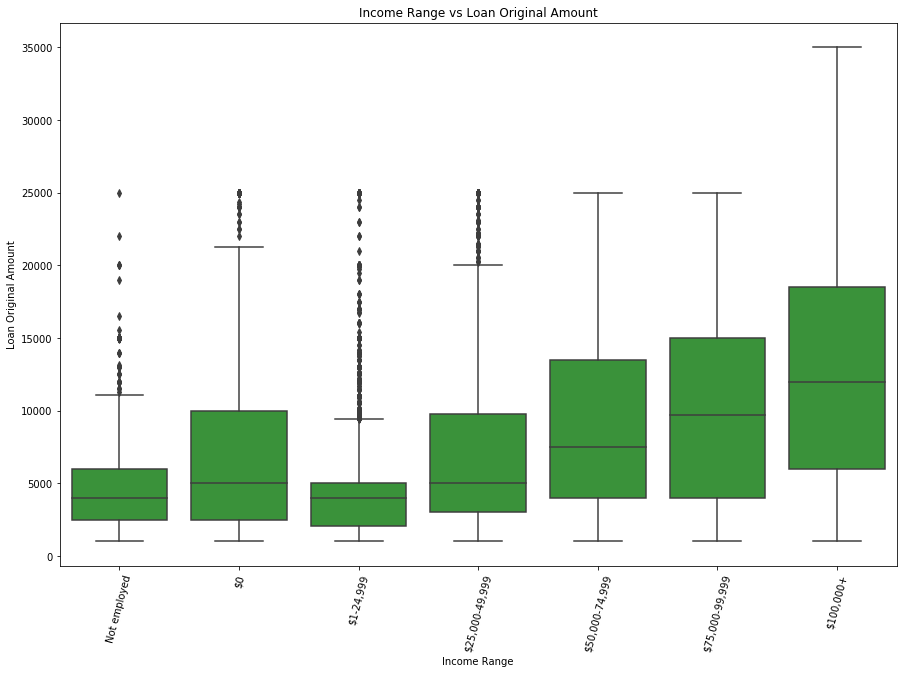

In [89]:
# orders of Income Ranges
order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

# plotting the boxplot
color = sns.color_palette()[2]
box = sns.boxplot(data=loan_data, x='IncomeRange', y='LoanOriginalAmount', color=color, order=order);

plt.xticks(rotation=75);
plt.xlabel('Income Range')
plt.ylabel('Loan Original Amount')
plt.title('Income Range vs Loan Original Amount')

box.figure.set_figwidth(15)
box.figure.set_figheight(10)

### Conclusion

In order to understand the bivariate relationship between income range and loan amount, a box plot have been used. As per the plot, income range of 1-24,000 has maximum outliers.

Also, for the highest income range starting from 50,000, the loan amount range is also high. However, these ranges do not seem to have any unusual observation/outlier.


### 3. What is Year wise borrower rate pattern?

In [90]:
# derive years from the creation date 

loan_data['Year'] = loan_data.ListingCreationDate.str.split('-').str[0]

In [91]:
year_cnt_value = loan_data.Year.value_counts()
year_cnt_value

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: Year, dtype: int64

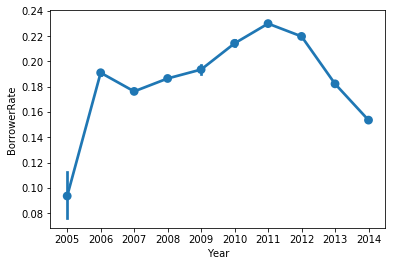

In [92]:
# visualising through a line graph 

sns.pointplot(data=loan_data, x='Year', y='BorrowerRate');

### Conclusion

From the above line plot, it can be seen that borrower rate was increased from year 2005 to 2006, having the highest peak at 2011. However, there is a decreaing trend starting from year 2012.

## Multivariate Analysis

### How Borrower Rate has changed over years for Homeowners vs Non-Homeowners?


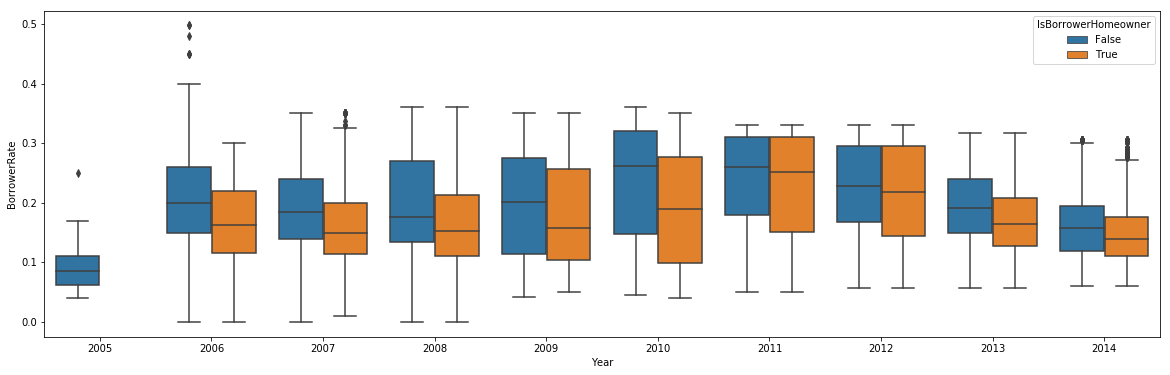

In [95]:
# visualisimg boxplot to analyze borrower rate for homeownervs vs non-homeowner across different years

multi = sns.boxplot(data=loan_data, x='Year', y='BorrowerRate', hue='IsBorrowerHomeowner');
multi.figure.set_figwidth(20)
multi.figure.set_figheight(6)


### Conclusion

For the purpose of multivariate analysis,as b change in Borrower rate of interest has been analysed over years with respect to borrowers who are Home owners vs Non-Homeowners.

For the above analysis, a boxplot has been used in order to compare the two categories across years.

As per the plot, the borrower rate for non-home owners has been consistently higher than home owners. Also, there has been a continuous decrease in spread of borrowing rate for both the types, which inidcates that Prosper might have improved their pricing strategy.

Also, the difference between the median borrower rate for both home owners and non-home owners was increasing significantly until 2010. However, this difference reduced significantly from 2011. 